In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\91702\Downloads\Algerian_forest_fires_dataset_UPDATE.csv")

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.7+ KB


In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [7]:
df.shape

(244, 15)

### Data Cleaning

In [8]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [9]:
# inorder to check the row which is having the missing value

In [10]:
df[df.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [11]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
234,21,9,2012,35,34,17,0.0,92.2,23.6,97.3,13.8,29.4,21.6,fire,1
235,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7,fire,1
236,23,9,2012,35,56,14,0.0,89.0,29.4,115.6,7.5,36.0,15.2,fire,1
237,24,9,2012,26,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,not fire,1
238,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3,not fire,1
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [12]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
##no duplicated data

In [14]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
#remove 165th row as it has string value for FWI
df = df.drop(165).reset_index(drop=True)

In [17]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [18]:
objects = [features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [19]:
df.shape

(243, 15)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 22.9+ KB


In [21]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [22]:
df.Classes 

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [23]:
df["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [24]:
df.Classes = df.Classes.str.strip()

In [25]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


<AxesSubplot:>

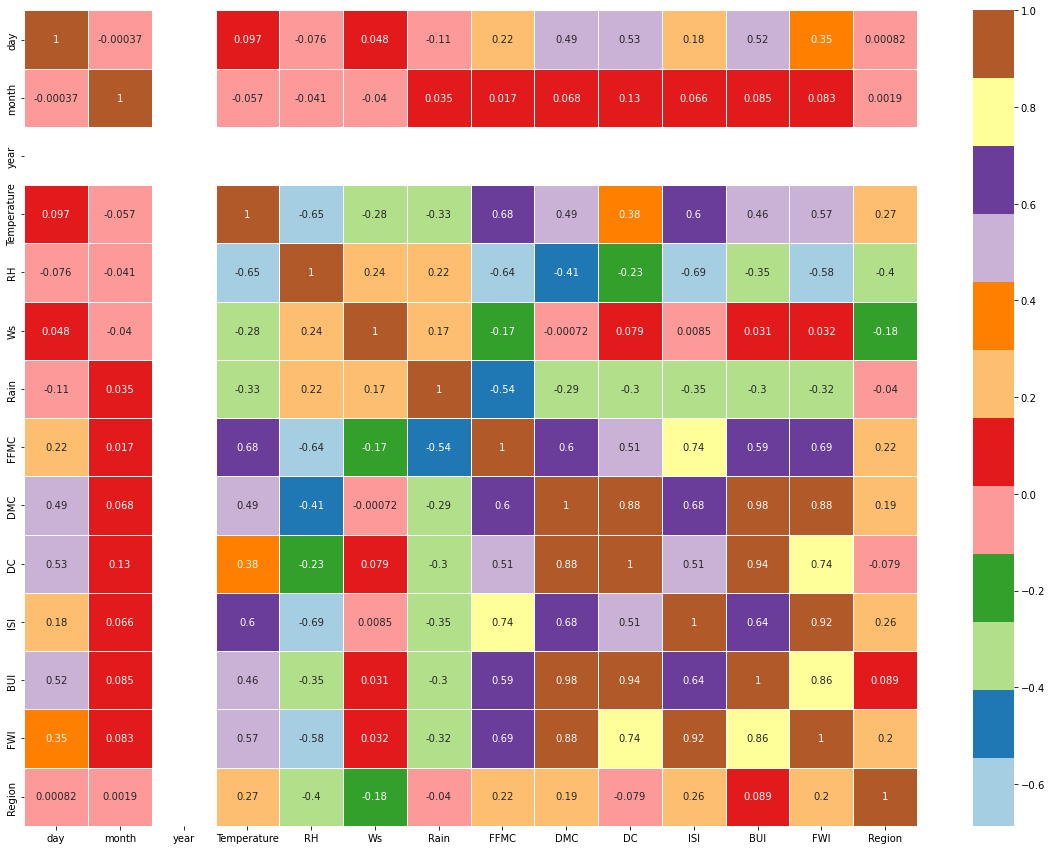

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

### Encoding

In [27]:
##Fire as 1 and not Fire as 0
df['Classes']= np.where(df['Classes']== 'not fire',0,1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [28]:
# Check counts
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

<AxesSubplot:>

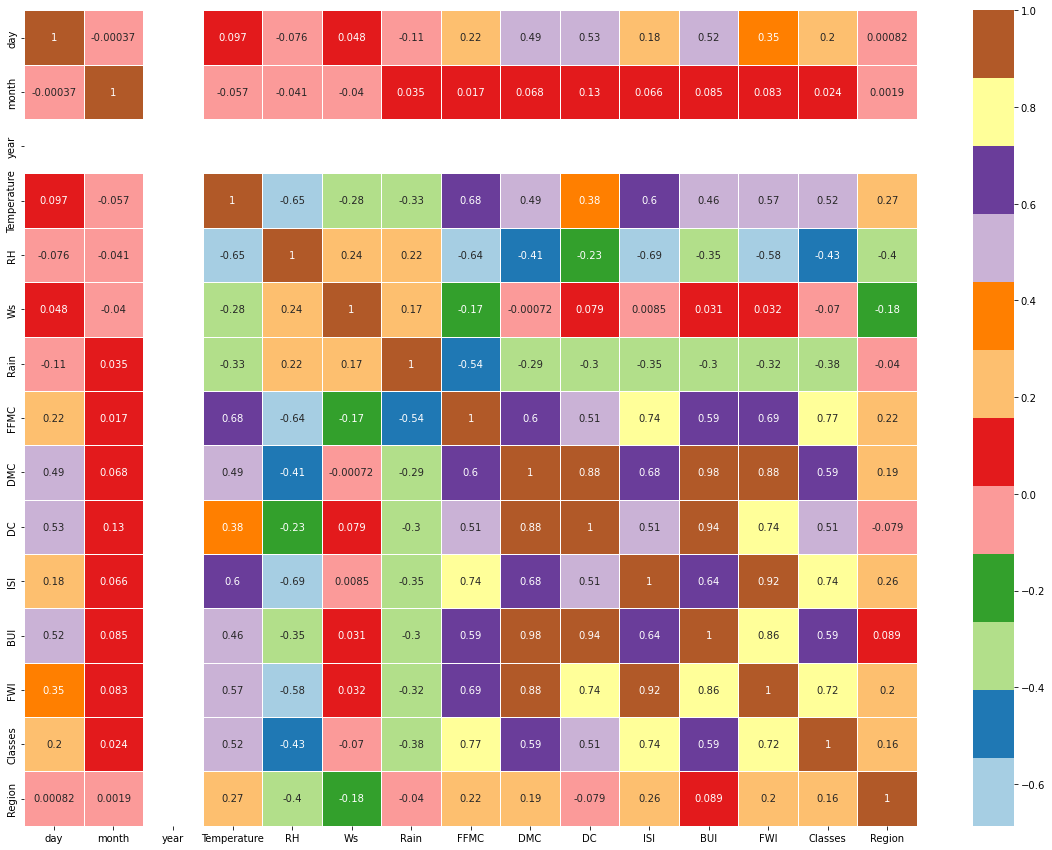

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

###  density plot for all features

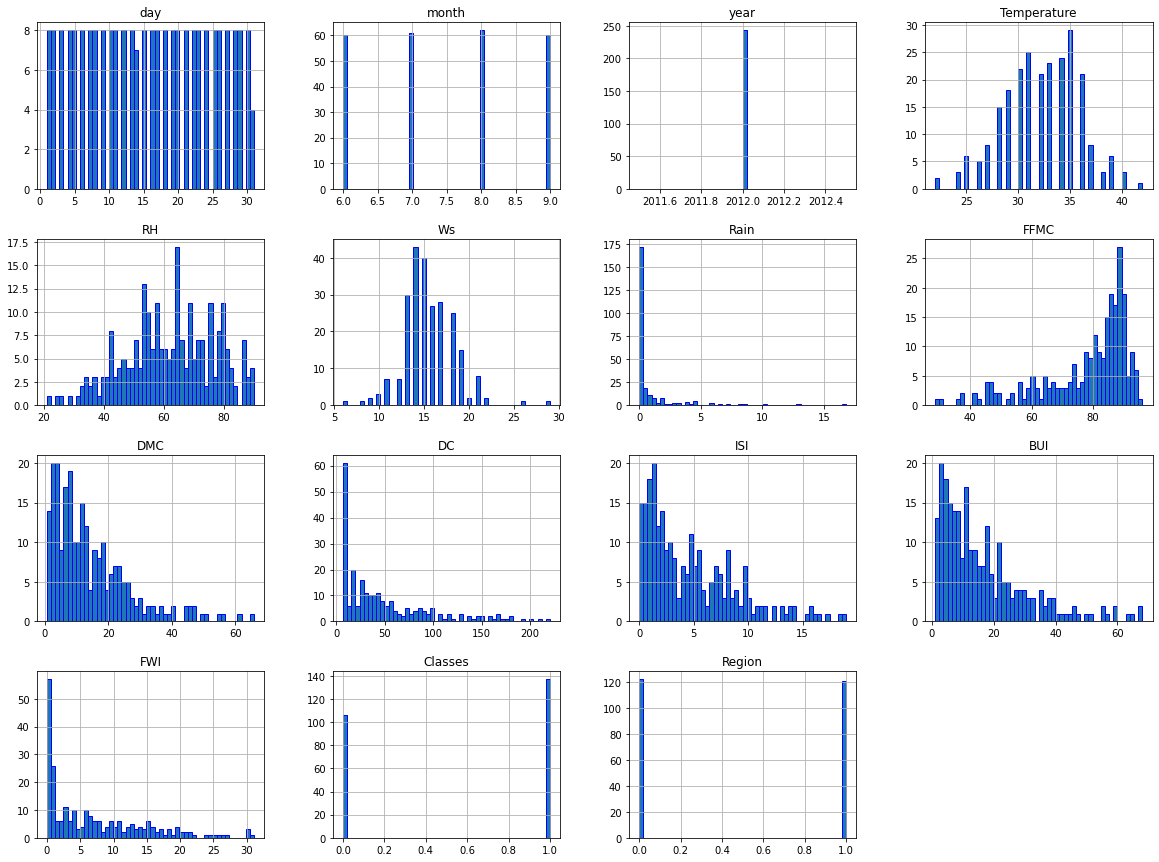

In [30]:
#plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

lineplot

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

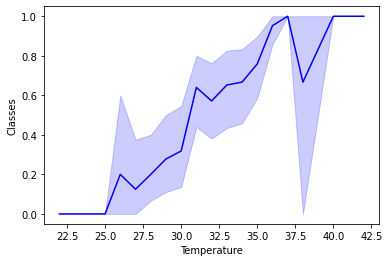

In [31]:
sns.lineplot(x='Temperature',y='Classes',data=df,color='blue')

In [32]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

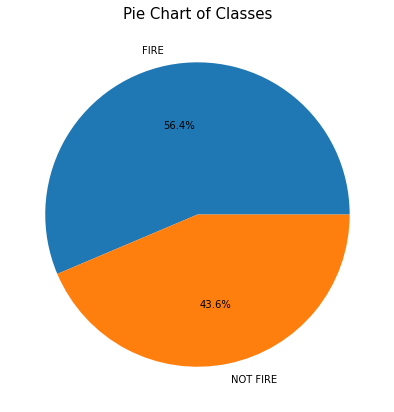

In [33]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

In [34]:
X = df.iloc[:, 0:13]
y = df['FWI']

In [35]:
X.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [36]:
y.head(10)

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
5    2.5
6    7.2
7    7.1
8    0.3
9    0.9
Name: FWI, dtype: float64

#Regression Anslysis

### Spliting the dataset into train and test

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)


In [39]:
X_train.shape

(182, 13)

In [40]:
y_train.shape

(182,)

In [41]:
X_test.shape

(61, 13)

In [42]:
y_test.shape

(61,)

In [43]:
X_train.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [44]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.012548,NaN,0.064643,-0.026017,0.064744,-0.096895,0.200917,0.475293,0.518656,0.136345,0.505941,0.323557
month,-0.012548,1.000000,NaN,-0.038849,-0.078540,0.031898,0.047124,0.017551,0.082367,0.121087,0.082006,0.093368,0.097279
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.064643,-0.038849,NaN,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.026017,-0.078540,NaN,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,0.064744,0.031898,NaN,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.096895,0.047124,NaN,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.200917,0.017551,NaN,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.475293,0.082367,NaN,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.518656,0.121087,NaN,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551


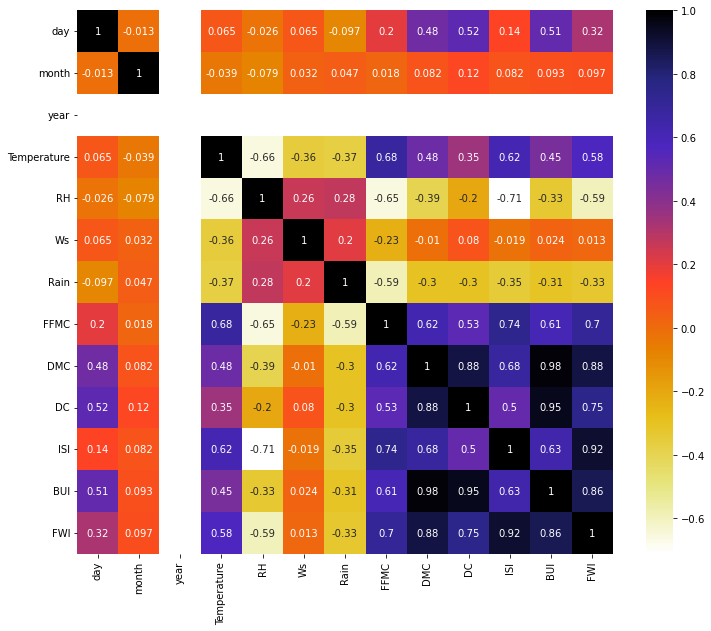

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [48]:
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [49]:
## Standardize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
scaler

StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_scaled

array([[ 0.19763619,  1.34865164,  0.        , ...,  0.86103378,
         0.82966632,  0.89709937],
       [-1.13870263,  1.34865164,  0.        , ..., -0.96914461,
        -0.93132657, -0.91779112],
       [-1.47278733,  0.44624503,  0.        , ...,  1.07841129,
         0.14874907,  2.75736213],
       ...,
       [ 1.08852874,  1.34865164,  0.        , ...,  0.25798649,
        -0.72000743, -0.57749915],
       [ 0.19763619, -0.45616158,  0.        , ...,  0.49640054,
        -0.24258268, -0.1010904 ],
       [ 0.64308246, -0.45616158,  0.        , ...,  0.92414338,
         2.26976718,  1.84991688]])

In [53]:
X_test_scaled

array([[ 3.08997758e-01,  1.34865164e+00,  0.00000000e+00,
        -8.63371954e-01, -2.72921871e-01, -5.40249712e-01,
        -3.63882055e-01,  7.69875468e-01, -2.11276144e-01,
         6.24865799e-01],
       [ 1.42261344e+00, -1.35856820e+00,  0.00000000e+00,
         1.28179795e+00, -1.64362804e+00, -8.88921512e-01,
        -9.04070350e-02,  5.52497959e-01,  2.11362151e-01,
        -5.57181353e-02],
       [-9.15979493e-01, -4.56161584e-01,  0.00000000e+00,
         2.09212999e-01,  4.45067072e-01,  1.20310929e+00,
        -3.63882055e-01,  5.10424892e-01, -2.11276144e-01,
         2.16515438e-01],
       [-1.36448515e-01,  4.46245028e-01,  0.00000000e+00,
         1.01365171e+00, -4.03465315e-01, -8.88921512e-01,
        -2.27144545e-01,  2.86035205e-01,  3.13495439e-02,
        -3.05265578e-01],
       [ 1.97636190e-01,  1.34865164e+00,  0.00000000e+00,
        -5.89332392e-02, -7.95095648e-01, -1.58626511e+00,
        -3.63882055e-01,  7.76887646e-01, -4.22595292e-01,
         3.

Text(0.5, 1.0, 'X_train After Scaling')

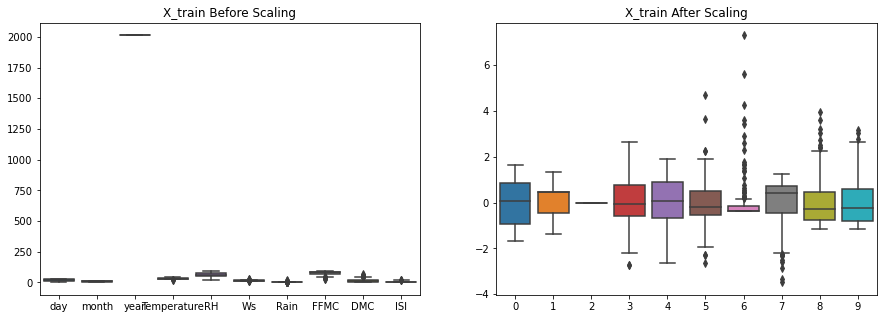

In [54]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Model Building

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
LinearRegression=LinearRegression()

In [57]:
LinearRegression.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
print('Intercept is :',LinearRegression.intercept_)
print('Coefficient is :',LinearRegression.coef_)

Intercept is : 7.5587912087912095
Coefficient is : [ 1.75074454e-01  5.29922980e-02 -1.11022302e-16  4.35338229e-03
  5.62621826e-02  8.72693549e-02 -2.09386360e-02 -5.62147874e-01
  3.71843811e+00  5.05637791e+00]


In [59]:
print("Training Score:",LinearRegression.score(X_train_scaled, y_train))
print("Test Score:",LinearRegression.score(X_test_scaled,y_test))

Training Score: 0.9699180414962887
Test Score: 0.9658793055975398


In [60]:
LinearRegression_predict = LinearRegression.predict(X_test_scaled)

In [61]:
LinearRegression_predict 

array([ 9.56687165,  7.76690386,  7.53505089,  5.87968271,  7.49339781,
       11.25195111, -0.84024615,  9.26440371,  5.06222777, 12.79609734,
        1.58433202, 13.51427759,  6.23683391, 15.05367321,  0.91417808,
        0.72461599,  2.07456403,  2.43726835,  3.8781451 ,  0.9128788 ,
       10.56558722,  5.73267295,  7.2250342 , -0.70341327,  2.13187333,
        3.5420702 ,  9.98864231,  0.34874438,  1.09218358,  2.0389741 ,
       13.61961602,  0.94452201, -0.60627286, 19.93076074,  4.22756561,
        0.75761665,  1.208194  , 18.66477451, 25.81295308,  2.30914775,
        7.11918196,  0.60759779, -0.74220225,  1.4409988 ,  0.50598328,
       -0.54805521,  3.9926781 ,  6.7657076 , -0.7991603 , 10.68391446,
        3.80519005,  9.91079966, -0.46347488,  1.37209554,  6.52848072,
        1.56519031, 11.36589825,  3.34241804,  3.44942954, 17.33923901,
        3.46111536])

Text(0, 0.5, 'Test Predicted Data')

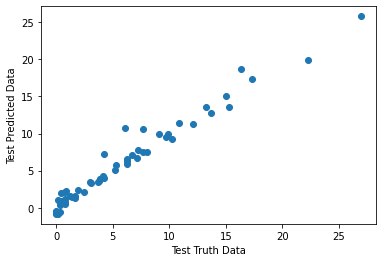

In [78]:
plt.scatter(y_test,LinearRegression_predict)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [80]:
## residuals
residuals=y_test-LinearRegression_predict

In [81]:
residuals

110    0.133128
150   -0.566904
37     0.464949
75     0.420317
109    0.206602
         ...   
179   -0.465898
160   -0.242418
159   -0.449430
170   -0.039239
221    0.238885
Name: FWI, Length: 61, dtype: float64

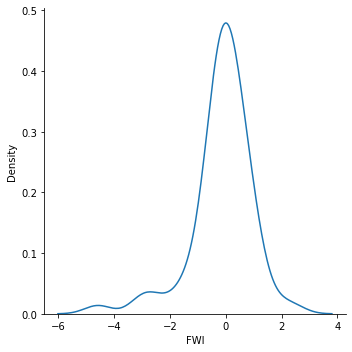

In [82]:
sns.displot(residuals,kind="kde")

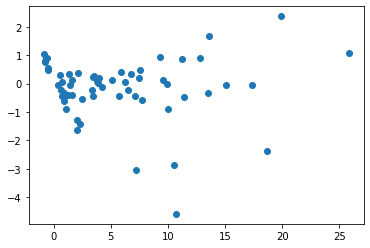

In [83]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(LinearRegression_predict,residuals)

In [63]:
from sklearn import metrics

In [64]:
meanAbErr = metrics.mean_absolute_error(y_test, LinearRegression_predict)
meanSqErr = metrics.mean_squared_error(y_test, LinearRegression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, LinearRegression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.6998689414155342
Mean Square Error: 1.1844792283620365
Root Mean Square Error: 1.0883378282325926


In [65]:
from sklearn.metrics import r2_score
score=r2_score(y_test, LinearRegression_predict)
print(score)

0.9658793055975398


In [66]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9590551667170477

In [67]:
## Ridge
from sklearn.linear_model import Ridge

In [68]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train_scaled, y_train)

Ridge()

In [69]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [ 0.17917141  0.05707422  0.          0.0163783   0.02739139  0.10742369
 -0.01344387 -0.50671199  3.70429368  4.97164701]


In [70]:
print("Training Score:",Ridge_Regression.score(X_train_scaled, y_train))
print("Test Score:",Ridge_Regression.score(X_test_scaled,y_test))

Training Score: 0.9698729841162209
Test Score: 0.9648795296211802


In [71]:
Ridge_Regression_Prediction = Ridge_Regression.predict(X_test_scaled)
Ridge_Regression_Prediction

array([ 9.55024628,  7.84381947,  7.55356182,  5.92644326,  7.5025832 ,
       11.23072082, -0.88020674,  9.27681019,  5.11517235, 12.77036502,
        1.61407717, 13.51206052,  6.30865069, 15.0206614 ,  0.95263223,
        0.67071972,  2.12131554,  2.48795317,  3.89822135,  0.80882069,
       10.59351546,  5.76291312,  7.26707465, -0.74049873,  2.15758715,
        3.6054714 ,  9.98830786,  0.33411169,  1.05170431,  2.01086675,
       13.61629248,  0.9407835 , -0.61856916, 19.87945341,  4.2466969 ,
        0.81448735,  1.28428206, 18.61553095, 25.74045764,  2.36339637,
        7.13289536,  0.67004715, -0.82915671,  1.51213008,  0.55630686,
       -0.68695184,  4.07678986,  6.74534939, -0.90354558, 10.73349185,
        3.82560827,  9.91219464, -0.51321391,  1.40236031,  6.52726227,
        1.59977606, 11.36815089,  3.44097707,  3.56750619, 17.31281205,
        3.47048359])

In [72]:
meanAbErr = metrics.mean_absolute_error(y_test, Ridge_Regression_Prediction)
meanSqErr = metrics.mean_squared_error(y_test, Ridge_Regression_Prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Ridge_Regression_Prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7108841156407053
Mean Square Error: 1.2191858454972366
Root Mean Square Error: 1.1041674897846054


In [73]:
# To find coefficient of determination
r2 =  r2_score(y_test, Ridge_Regression_Prediction)
print("R-Square:",r2)

R-Square: 0.9648795296211802


In [74]:
##Lasso Regression
from sklearn.linear_model import Lasso

Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train_scaled, y_train)

Lasso()

In [75]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [ 0.          0.          0.          0.         -0.          0.
 -0.          0.          3.14197706  4.02820639]


In [76]:
print("Training Score:",Lasso_Regression.score(X_train_scaled, y_train))
print("Test Score:",Lasso_Regression.score(X_test_scaled,y_test))

Training Score: 0.9472315394105817
Test Score: 0.9376608832413118


In [77]:
Lasso_Regression_prediction = Lasso_Regression.predict(X_test_scaled)
Lasso_Regression_prediction

array([ 9.41205482,  7.99844209,  7.76713528,  6.42761801,  7.83425072,
       11.03474581,  0.3732659 ,  9.27417288,  5.89058682, 12.11675456,
        2.72767649, 12.55638768,  6.95133341, 14.13515815,  2.07735448,
        1.24093469,  3.103201  ,  3.4936519 ,  4.72385155,  1.51841689,
       10.26715978,  6.14712898,  6.960676  ,  0.42244811,  3.46938292,
        4.24233835,  9.83944624,  1.09703911,  1.31470801,  2.68483004,
       12.55370298,  1.4941479 ,  0.39087699, 17.96041778,  4.90662038,
        2.16540995,  2.41830105, 16.97516285, 22.9743191 ,  3.29294985,
        7.2926021 ,  1.57125017, -0.3857295 ,  2.60139201,  1.73340109,
       -0.37176948,  4.64610503,  7.30323318, -0.47711392, 10.2279644 ,
        4.88202928,  9.86532584, -0.37874949,  2.60504307,  6.64228009,
        2.80875195, 10.7678947 ,  4.44604722,  4.45302724, 15.93299373,
        4.35133386])